<h1>An Exploration of Data Relating to Childhood Allergies</h1>
    <hr>
<h3>Data Science CSE 280
    <br>
17 March 2023
    <br>
Vyacheslav Lukiyanchuk and Linnea Castro</h3>
    <hr>

<h2>Synopsis:</h2>
For our Data Science project, we are providing an analysis of a dataset collected as part of a 2016 study published in the BMC Pediatrics journal studying provider diagnosed conditions (asthma, allergic rhinitis, and food allergies) across children of varying ages, and ethnic backgrounds.  
<p>
Our first step was to do a preliminary survey of the data set to develop a feel for the type of information included, which would eventually steer the questions we asked, and the data we choose to analyze.  Together with this initial survey, we also were able to see ways that we could pare down the data set to make it more workable and relevant to the analytics we choose to explore. 
<p>
We brainstormed possible topics to explore, led by the information the data set provided, and our curiosities.  Particular interests included how race and ethnicity related to allergy prevalence, and whether or not gender had an influence on allergy development.  
<p>
Our first steps involved basic manipulations to examine and clean the data set, and then save that dataset into a new csv to work from.  We then explored three questions detailed below.

<br>

<h2>Questions Explored:</h2>
<b>What is the Prevalence of all Types of Food Allergies and Provider Diagnosed Conditions?</b>
<br>
In this inquiry, we used only the data columns that indicated the presence of an allergy or diagnoses (asthma, allergic rhinitis, etc.) to gain an understanding of which allergies were most commonly experienced within the data set.  It was interesting to note that diagnoses as a whole, were more prevalent than individual allergies.  The most common diagnoses was asthma, with close to 20% of the entire data set having a diasnosis.  The most common allergen was peanut, followed closely by milk, egg, and shellfish allergies.  

<p>

<b>Asthma Diagnosis as related to Race and Ethnicity</b>
<br>
Since asthma was the most prevalent diagnosis, the next thing we decided to explore was how asthma was related to race and ethnicity.  Each person represented in the data set as a race could identify as either: black, white, or unknown.  Ethnicity, a separate column, gave the options of either hispanic or non-hispanic.  In order to give a clearer description to the dataset, we chose to marry the two columns together into a new “race_ethnicity” column.  
<br>
Because of the way the data was collected, the entries in the “ASTHMA_START” column were given as a specific decimal age.  In this case, we were less interested in asthma as a function of age, and more interested in its presence.  Thus, we changed any start age to simply be “True”.  All NaN instances were replaced with “False”, meaning no asthma diagnosis.  
<br>
The resulting bar chart is interesting because each “bar” needs to be individually evaluated and digested.  The highest prevalence belonged to the “black and non-hispanic” group, followed by the “unknown and non-hispanic group”, and then the “black and hispanic” group.  The way the race an ethnicity information was originally collected makes it difficult to draw definitive conclusions, but nonetheless, gives an interesting snapshot of asthma prevalence among various self identified race and ethnicity group combinations.

<p>
    
<b>Peanut Allergy Onset and Relationship to Gender</b>
<br>
We used the linear regression tool through Seaborn to explore whether there was a relationship between birth year and peanut allergy diagnosis.  The negative slope of the linear regression suggests that for children born more recently, they are more likely to be diagnosed earlier with a peanut allergy.  A correlation factor of -0.83 suggests that there is a negative relationship between peanut allergy start and birth year.  The data seems to suggest that allergy testing is more common in recent years than it was 30 years ago, and no doubt, advances in medical technology and accessibility have made this testing more possible.  The largest question this data seems to ask is: are allergies more common now than they were 30 years ago?  
<br>
The next plot we looked at was a single variable density plot, which shows that initial peanut allergy diagnosis is densest between the ages of 0 and 5.  
<br>
The chart in this sequence is a bar chart which shows peanut allergy onset as a function of gender, with female instances represented by a blue bar, and male instances represented in orange.  In the vast majority of count, males appear to have significantly higher instances of peanut allergies, especially in the years of peak diagnosis, between ages 0 and 5.  
    
<p>
    
<b>Wheat Allergy Onset and Relationship to Gender</b>
<br>
We recycled the same process conducted in the "Peanut Allergy Onset" exploration above to run the same plots for wheat allergies.  We were curious to see if there was perhaps a different gender distribution among children with wheat allergies than peanut allergies.  
<br>
The findings were very similar to that of the Peanut Allergy category, with males having much higher rates of diagnosis than females.  In order to verify that this finding was not caused by a larger number of males than females overall, we conducted a bar chart counting total number of females and males in the study, and proving that the split was roughly equal.  

    
<h2>Conclusion:</h2>
This study underscores the value of having data scientists collaborate with the researchers conducting the study, and all stakeholders (medical practitioners, etc.).  There were several times when we had questions about the data gathered and had to make decisions independently about which data sets to eliminate, etc.  On one hand, it was powerful to be able to make these decisions without outside direction.  For example, we chose to get rid of the columns containing the allergy end date.    

    
<h2>More Ideas to Look into:</h2>
At what ages are children getting diagnosed with a condition/allergy?
<br>
What is the mean age for each type of allergen diagnosis? 
<br>
Is food allergy correlated with onset of asthma or allergic rhinitis?
<br>
Are people with confirmed Asthma cases more likely to also have food allergies?
<br>
What is prevalence of Asthma for people on Medicaid vs not Medicaid?

<p>

<a href="https://bmcpediatr.biomedcentral.com/articles/10.1186/s12887-016-0673-z" target="new">Link to Original Study</a>


In [2]:
# Importing Pandas, Numpy libraries, and MatPlotLib

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use(['seaborn-notebook']) 

In [3]:
# Importing original csv file as dataframe, df, and printing a
# small overview of data. 

df = pd.read_csv('food-allergy-analysis-Zenodo.csv')
pd.set_option('display.max_columns', 50) # Display all columns as you scroll right
df

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,WHEAT_ALG_START,WHEAT_ALG_END,PEANUT_ALG_START,PEANUT_ALG_END,SESAME_ALG_START,SESAME_ALG_END,TREENUT_ALG_START,TREENUT_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,PISTACH_ALG_START,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.736482,7.449692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736482,NaN,NaN,NaN,5.426420,7.449692,NaN,NaN,NaN
333196,333197,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.019165,6.984257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,333198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.443532,7.405886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321697,NaN,2.321697,6.650240,4.0
333198,333199,2006,S0 - Male,R3 - Other,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,7.017112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Obtaining information about rows and columns: 333200 rows, 50 cols

df.shape 

(333200, 50)

In [5]:
# More detailed column info, and datatype overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

In [6]:
#remove data like "treenuts" with low number count, since they are not statistaclly important
list_of_important_cols = [i for i in list(df) if df[i].count()>100]
df_clean = df[list_of_important_cols]
#Replace any dates of less then 0 with "NaN"
df_for_cleaning = df_clean._get_numeric_data()
df_for_cleaning[df_for_cleaning < 0] = np.nan
df_clean = df_clean.set_index('SUBJECT_ID')
#save cleaned data
df_clean.to_csv('food-allergy-analysis-Zenodo_cleaned.csv')

In [7]:
#load cleaned data back in, in future can skip to this step instead of recleaning data.
df_clean = pd.read_csv('food-allergy-analysis-Zenodo_cleaned.csv')

In [8]:
# Removing columns with allergy "end" date by eliminating cols containing "end"
# Also removing columns with "RX" in column name 

list_of_cols_without_end_or_rx = [i for i in list(df) if 'END' not in i and 'RX' not in i]
print(list_of_cols_without_end_or_rx)

['SUBJECT_ID', 'BIRTH_YEAR', 'RACE_FACTOR', 'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT', 'AGE_START_YEARS', 'SHELLFISH_ALG_START', 'FISH_ALG_START', 'MILK_ALG_START', 'SOY_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START', 'PEANUT_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'PISTACH_ALG_START', 'ALMOND_ALG_START', 'BRAZIL_ALG_START', 'HAZELNUT_ALG_START', 'CASHEW_ALG_START', 'ATOPIC_DERM_START', 'ALLERGIC_RHINITIS_START', 'ASTHMA_START']


In [9]:
df_without_end_or_rx = df[list_of_cols_without_end_or_rx]
df_without_end_or_rx

,SUBJECT_ID,BIRTH_YEAR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,ATOPIC_DERM_START,ALLERGIC_RHINITIS_START,ASTHMA_START
0,1,2006,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2006,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995
3,4,2004,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.736482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736482,NaN,5.426420
333196,333197,2006,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.019165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,333198,2006,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.443532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321697
333198,333199,2006,R3 - Other,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#save smaller database to file
df_without_end_or_rx = df_without_end_or_rx.set_index('SUBJECT_ID')
df_without_end_or_rx.to_csv('food-allergy-analysis-Zenodo_no_end_or_rx.csv')

In [11]:
#load smaller database to file in order to skip cleaning process
df_without_end_or_rx = pd.read_csv('food-allergy-analysis-Zenodo_no_end_or_rx.csv')

In [12]:
# Description of data including those with object type (include = "all")

df_without_end_or_rx.describe(include = "all")

,SUBJECT_ID,BIRTH_YEAR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,ATOPIC_DERM_START,ALLERGIC_RHINITIS_START,ASTHMA_START
count,333200.000000,333200.000000,333200,333200,333200,333200,333200.000000,5246.000000,1796.000000,7289.000000,2419.000000,6065.000000,1146.000000,8653.000000,766.000000,1.000000,704.000000,285.000000,369.000000,386.000000,68.000000,253.000000,561.000000,49515.000000,55567.000000,63874.000000
unique,NaN,NaN,5,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,183308,317868,246340,303538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166600.500000,2001.261191,NaN,NaN,NaN,NaN,3.942140,8.724076,6.628690,3.287408,3.959135,3.274626,4.548648,5.027637,6.135395,3.967146,7.595179,7.744554,7.148128,7.678366,6.831179,7.876277,6.190359,4.282436,7.275146,5.979887
std,96186.699184,6.603479,NaN,NaN,NaN,NaN,4.646174,5.273093,5.015358,4.098283,4.485301,3.754197,4.560735,4.392665,4.172892,NaN,4.847772,4.732286,4.334246,5.330696,4.832298,4.631870,4.347125,4.683577,4.190266,4.390784
min,1.000000,1983.000000,NaN,NaN,NaN,NaN,-4.312115,0.093087,0.076660,-60.112252,-2.264203,-98.866530,0.156057,0.000000,0.487337,3.967146,0.336756,0.914442,0.692676,0.303901,1.133470,0.774812,0.112252,-103.961670,-95.238877,1.002053
25%,83300.750000,1996.000000,NaN,NaN,NaN,NaN,0.021903,3.975359,2.235455,0.747433,0.809035,1.051335,1.079398,1.574264,2.765914,3.967146,3.707734,3.912389,3.718001,3.032170,3.256674,4.016427,2.707734,0.654346,3.912389,2.165640
50%,166600.500000,2002.000000,NaN,NaN,NaN,NaN,1.763176,8.361396,5.156742,1.420945,1.850787,1.754962,2.551677,3.326489,5.026694,3.967146,6.328542,6.472279,6.064339,6.197125,5.244353,6.811773,4.985626,2.255989,6.721424,4.807666
75%,249900.250000,2007.000000,NaN,NaN,NaN,NaN,7.208761,13.078029,10.251198,4.295688,5.761807,4.090349,6.737166,7.241615,8.802190,3.967146,11.329227,11.403149,10.346338,11.873374,9.412731,11.600274,9.026694,6.811773,10.220397,9.095140


In [13]:
# What is the prevalence of all types of food allergies and provider diagnosed conditions
# Only want to look at columns detailing allergies/diseases

listconditions=list(df_without_end_or_rx)[7:]
print(listconditions)

['SHELLFISH_ALG_START', 'FISH_ALG_START', 'MILK_ALG_START', 'SOY_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START', 'PEANUT_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'PISTACH_ALG_START', 'ALMOND_ALG_START', 'BRAZIL_ALG_START', 'HAZELNUT_ALG_START', 'CASHEW_ALG_START', 'ATOPIC_DERM_START', 'ALLERGIC_RHINITIS_START', 'ASTHMA_START']


In [14]:
# Prevalence of each condition as a percentage of entire dataset
# Calculated by counting number of instances of that condition divided by total data entries
# Multiplied by 100 to get percentage of whole

prevalence = (df[listconditions].count()/333200.0*100)
prevalence = prevalence.sort_values()
print(prevalence)

TREENUT_ALG_START           0.000300
BRAZIL_ALG_START            0.020408
HAZELNUT_ALG_START          0.075930
PECAN_ALG_START             0.085534
PISTACH_ALG_START           0.110744
ALMOND_ALG_START            0.115846
CASHEW_ALG_START            0.168367
WALNUT_ALG_START            0.211285
SESAME_ALG_START            0.229892
WHEAT_ALG_START             0.343938
FISH_ALG_START              0.539016
SOY_ALG_START               0.725990
SHELLFISH_ALG_START         1.574430
EGG_ALG_START               1.820228
MILK_ALG_START              2.187575
PEANUT_ALG_START            2.596939
ATOPIC_DERM_START          14.860444
ALLERGIC_RHINITIS_START    16.676771
ASTHMA_START               19.169868
dtype: float64


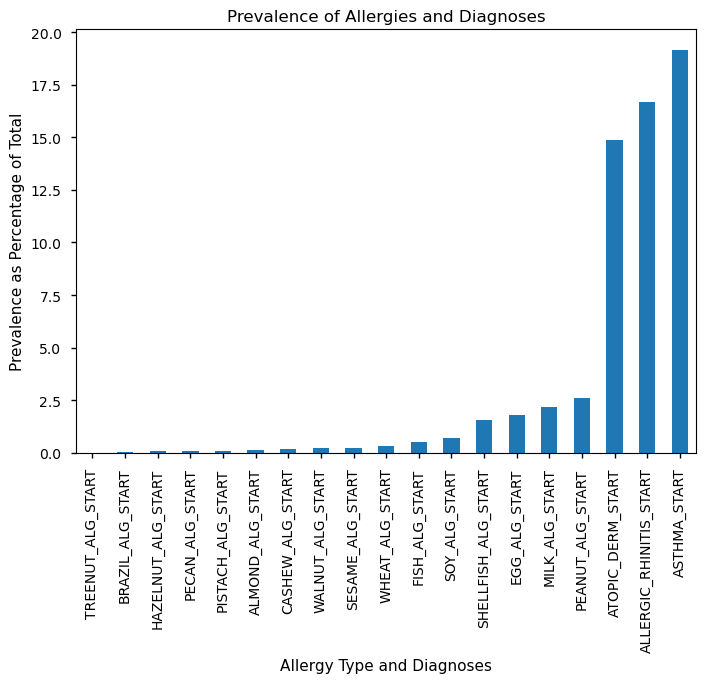

In [15]:
# Displaying prevalence of allergies and diagnoses

prevalence.plot.bar()

plt.title('Prevalence of Allergies and Diagnoses')
plt.xlabel('Allergy Type and Diagnoses')
plt.ylabel('Prevalence as Percentage of Total')

plt.show()

In [16]:
# Creating a dataframe for just race, ethnicity, and asthma prevalence

race_ethnicity_asthma = df[['RACE_FACTOR', 'ETHNICITY_FACTOR', 'ASTHMA_START']].copy()
race_ethnicity_asthma.head()


,RACE_FACTOR,ETHNICITY_FACTOR,ASTHMA_START
0,R1 - Black,E0 - Non-Hispanic,NaN
1,R0 - White,E0 - Non-Hispanic,NaN
2,R0 - White,E1 - Hispanic,5.127995
3,R4 - Unknown,E1 - Hispanic,NaN
4,R1 - Black,E0 - Non-Hispanic,NaN


In [17]:
# Combining race and ethnicity into one new column

race_ethnicity_asthma['race_ethnicity'] = race_ethnicity_asthma['RACE_FACTOR'] + " " + race_ethnicity_asthma['ETHNICITY_FACTOR']
race_ethnicity_asthma.head()

,RACE_FACTOR,ETHNICITY_FACTOR,ASTHMA_START,race_ethnicity
0,R1 - Black,E0 - Non-Hispanic,NaN,R1 - Black E0 - Non-Hispanic
1,R0 - White,E0 - Non-Hispanic,NaN,R0 - White E0 - Non-Hispanic
2,R0 - White,E1 - Hispanic,5.127995,R0 - White E1 - Hispanic
3,R4 - Unknown,E1 - Hispanic,NaN,R4 - Unknown E1 - Hispanic
4,R1 - Black,E0 - Non-Hispanic,NaN,R1 - Black E0 - Non-Hispanic


In [18]:
# In ASTHMA_START column, changing all start ages to True (rather than specific start age) because we just want
# to view positive cases

race_ethnicity_asthma.loc[~race_ethnicity_asthma['ASTHMA_START'].isnull(), 'ASTHMA_START'] = True
race_ethnicity_asthma.head()

,RACE_FACTOR,ETHNICITY_FACTOR,ASTHMA_START,race_ethnicity
0,R1 - Black,E0 - Non-Hispanic,NaN,R1 - Black E0 - Non-Hispanic
1,R0 - White,E0 - Non-Hispanic,NaN,R0 - White E0 - Non-Hispanic
2,R0 - White,E1 - Hispanic,True,R0 - White E1 - Hispanic
3,R4 - Unknown,E1 - Hispanic,NaN,R4 - Unknown E1 - Hispanic
4,R1 - Black,E0 - Non-Hispanic,NaN,R1 - Black E0 - Non-Hispanic


In [19]:
# Replaced all NaN values in ASTHMA_START column with False.  
# True values stay true.

race_ethnicity_asthma['ASTHMA_START']= race_ethnicity_asthma['ASTHMA_START'].fillna(False)
race_ethnicity_asthma.head()

,RACE_FACTOR,ETHNICITY_FACTOR,ASTHMA_START,race_ethnicity
0,R1 - Black,E0 - Non-Hispanic,False,R1 - Black E0 - Non-Hispanic
1,R0 - White,E0 - Non-Hispanic,False,R0 - White E0 - Non-Hispanic
2,R0 - White,E1 - Hispanic,True,R0 - White E1 - Hispanic
3,R4 - Unknown,E1 - Hispanic,False,R4 - Unknown E1 - Hispanic
4,R1 - Black,E0 - Non-Hispanic,False,R1 - Black E0 - Non-Hispanic


In [20]:
# Further simplifying the data, so we just look at our new "race_ethnicity" column and the 
# Asthma column, which we renamed "ASTHMA_COUNT" that contains True/False data about diagnosis.
# ASTHMA_COUNT column will count ALL cases, both True and False, in a given race_ethnicity subset.

list_columns = ['race_ethnicity', 'ASTHMA_START'] # Only looking at these two columns

count_race = (race_ethnicity_asthma[list_columns].
              groupby('race_ethnicity', as_index = False).
              count().
              rename(columns={'ASTHMA_START': 'ASTHMA_COUNT'}))

count_race.head()

,race_ethnicity,ASTHMA_COUNT
0,R0 - White E0 - Non-Hispanic,178346
1,R0 - White E1 - Hispanic,4962
2,R1 - Black E0 - Non-Hispanic,95715
3,R1 - Black E1 - Hispanic,2080
4,R2 - Asian or Pacific Islander E0 - Non-Hispanic,9083


In [21]:
# Since we converted Asthma column to True, False, we can use sum to evaluate confirmed asthma
# diagnoses.  True evaluates to 1 and False evaluates to 0. 
# ASTHMA_CONFIRMED column therefore contains a count of positive asthma diagnoses per race_ethnicity subset.

sum_race = (race_ethnicity_asthma[list_columns].
              groupby('race_ethnicity', as_index = False).
              sum().
              rename(columns={'ASTHMA_START': 'ASTHMA_CONFIRMED'}))

sum_race.head()

,race_ethnicity,ASTHMA_CONFIRMED
0,R0 - White E0 - Non-Hispanic,30254
1,R0 - White E1 - Hispanic,1017
2,R1 - Black E0 - Non-Hispanic,24781
3,R1 - Black E1 - Hispanic,509
4,R2 - Asian or Pacific Islander E0 - Non-Hispanic,1278


In [22]:
# Joining count_race dataframe with sum_race dataframe using the commonality of
# race_ethnicity column.  Putting this into one dataframe called prevalence_race.
# Now there's one dataframe with the three columns we want to look at.
# We will use ASTHMA_COUNT and ASTHMA_CONFIRMED to create a new column as a percentage
# of positive confirmed cases from a given race/ethnicity subset. 

prevalence_race = count_race.merge(sum_race, on='race_ethnicity', how = 'inner')
prevalence_race.head()

,race_ethnicity,ASTHMA_COUNT,ASTHMA_CONFIRMED
0,R0 - White E0 - Non-Hispanic,178346,30254
1,R0 - White E1 - Hispanic,4962,1017
2,R1 - Black E0 - Non-Hispanic,95715,24781
3,R1 - Black E1 - Hispanic,2080,509
4,R2 - Asian or Pacific Islander E0 - Non-Hispanic,9083,1278


In [23]:
# Perform calculation to divide confirmed asthma diagnosis by group prevalence.
# Divide by 100 to get percentage.
# Put this in new column called ASTHMA_PREV

prevalence_race['ASTHMA_PREV'] = (prevalence_race['ASTHMA_CONFIRMED'] / prevalence_race['ASTHMA_COUNT']) * 100
prevalence_race.head()

,race_ethnicity,ASTHMA_COUNT,ASTHMA_CONFIRMED,ASTHMA_PREV
0,R0 - White E0 - Non-Hispanic,178346,30254,16.963655
1,R0 - White E1 - Hispanic,4962,1017,20.495768
2,R1 - Black E0 - Non-Hispanic,95715,24781,25.890404
3,R1 - Black E1 - Hispanic,2080,509,24.471154
4,R2 - Asian or Pacific Islander E0 - Non-Hispanic,9083,1278,14.070241


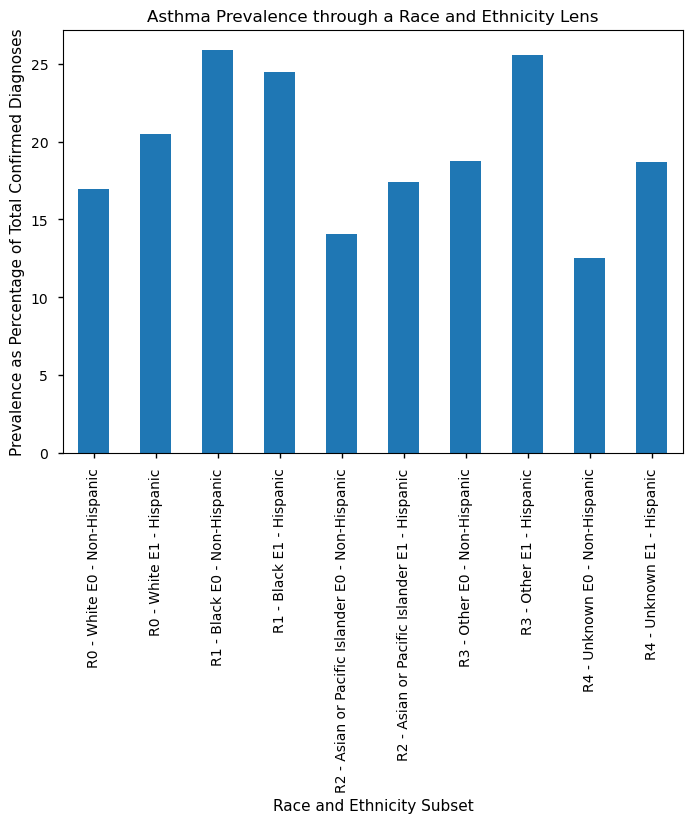

In [24]:
# Plotting data in bar chart.  

prevalence_race.set_index('race_ethnicity').ASTHMA_PREV.plot.bar()

plt.title('Asthma Prevalence through a Race and Ethnicity Lens')
plt.xlabel('Race and Ethnicity Subset')
plt.ylabel('Prevalence as Percentage of Total Confirmed Diagnoses')

plt.show()

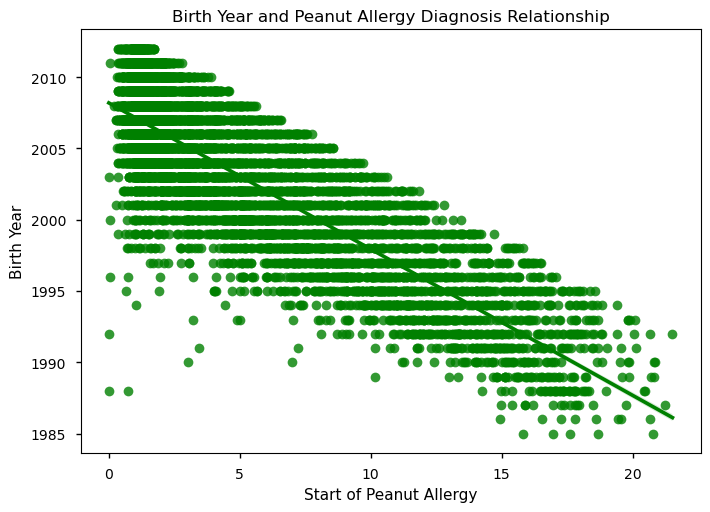

In [25]:
# Examining the relationship and possible correlation between birth year and peanut allergy dianosis. 

sns.regplot(x="PEANUT_ALG_START",y="BIRTH_YEAR", data=df, color='green')

plt.title('Birth Year and Peanut Allergy Diagnosis Relationship')
plt.xlabel('Start of Peanut Allergy')
plt.ylabel('Birth Year')

plt.show()

In [26]:
# Analyzing correlation between peanut allergy onset and birth year. 

df[["PEANUT_ALG_START", "BIRTH_YEAR"]].corr()

,PEANUT_ALG_START,BIRTH_YEAR
PEANUT_ALG_START,1.000000,-0.830018
BIRTH_YEAR,-0.830018,1.000000


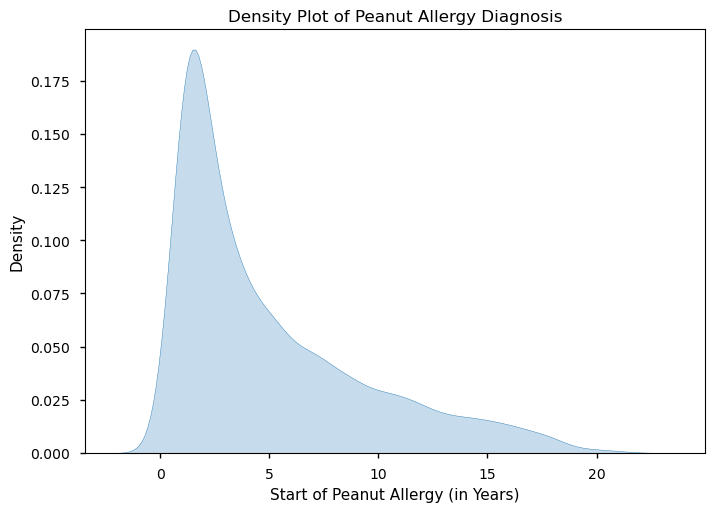

In [27]:
sns.kdeplot(df.PEANUT_ALG_START, shade=True)

plt.title('Density Plot of Peanut Allergy Diagnosis')
plt.xlabel('Start of Peanut Allergy (in Years)')
plt.ylabel('Density')

plt.show()

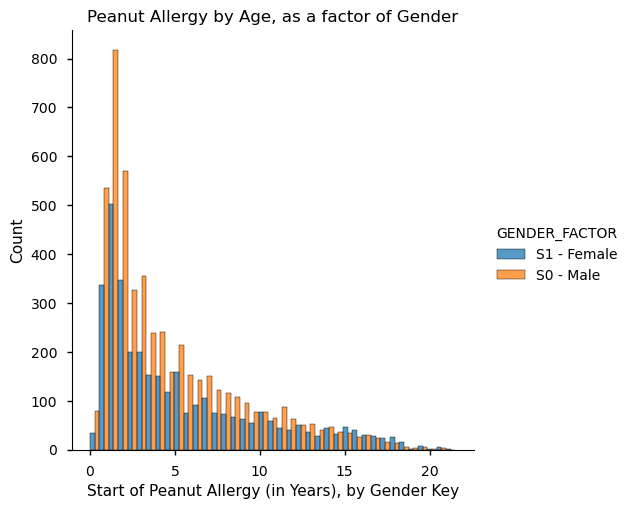

In [28]:
sns.displot(df, x="PEANUT_ALG_START", hue="GENDER_FACTOR", multiple="dodge")


plt.title('Peanut Allergy by Age, as a factor of Gender')
plt.xlabel('Start of Peanut Allergy (in Years), by Gender Key')
plt.ylabel('Count')

plt.show()

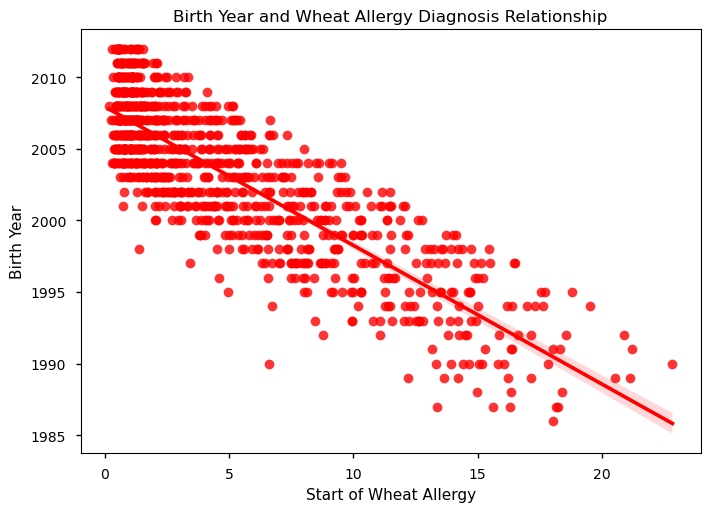

In [29]:
# Examining the relationship and possible correlation between birth year and wheat allergy dianosis. 

sns.regplot(x="WHEAT_ALG_START", y="BIRTH_YEAR", data=df, color='red')

plt.title('Birth Year and Wheat Allergy Diagnosis Relationship')
plt.xlabel('Start of Wheat Allergy')
plt.ylabel('Birth Year')

plt.show()

In [30]:
# Analyzing correlation between wheat allergy onset and birth year. 

df[["WHEAT_ALG_START", "BIRTH_YEAR"]].corr()

,WHEAT_ALG_START,BIRTH_YEAR
WHEAT_ALG_START,1.000000,-0.843475
BIRTH_YEAR,-0.843475,1.000000


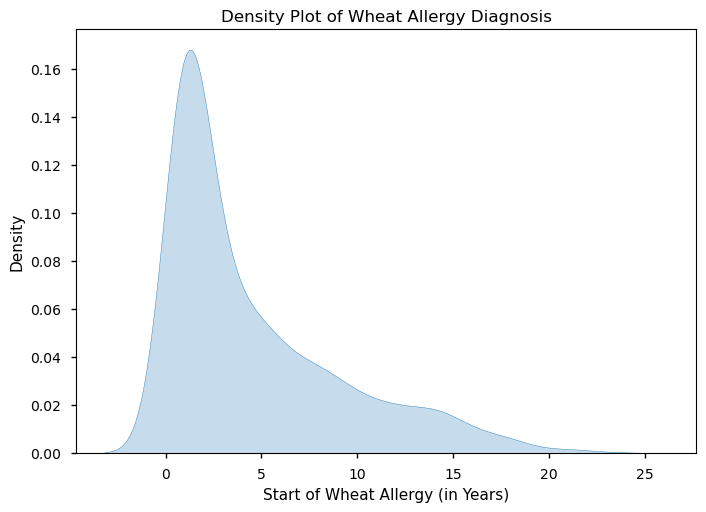

In [31]:
sns.kdeplot(df.WHEAT_ALG_START, shade=True)

plt.title('Density Plot of Wheat Allergy Diagnosis')
plt.xlabel('Start of Wheat Allergy (in Years)')
plt.ylabel('Density')

plt.show()

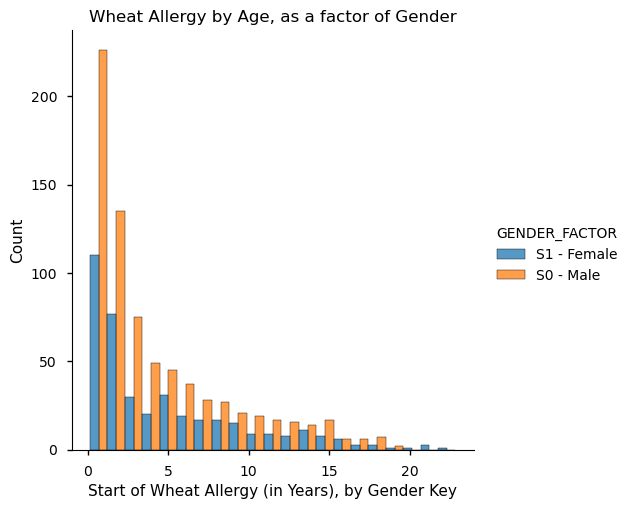

In [32]:
sns.displot(df, x="WHEAT_ALG_START", hue="GENDER_FACTOR", multiple="dodge")


plt.title('Wheat Allergy by Age, as a factor of Gender')
plt.xlabel('Start of Wheat Allergy (in Years), by Gender Key')
plt.ylabel('Count')

plt.show()

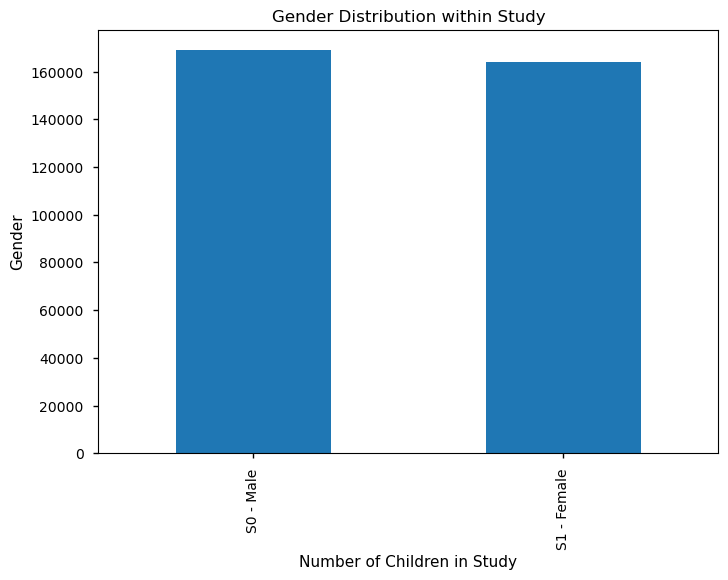

In [33]:
gender = df.groupby(['GENDER_FACTOR']).count()
#print(gender)
gender.SUBJECT_ID.plot.bar()

plt.title('Gender Distribution within Study')
plt.xlabel('Number of Children in Study')

plt.ylabel('Gender')

plt.show()

Text(0.5, 1.0, 'allergies percentage for people without asthma or rhintis')

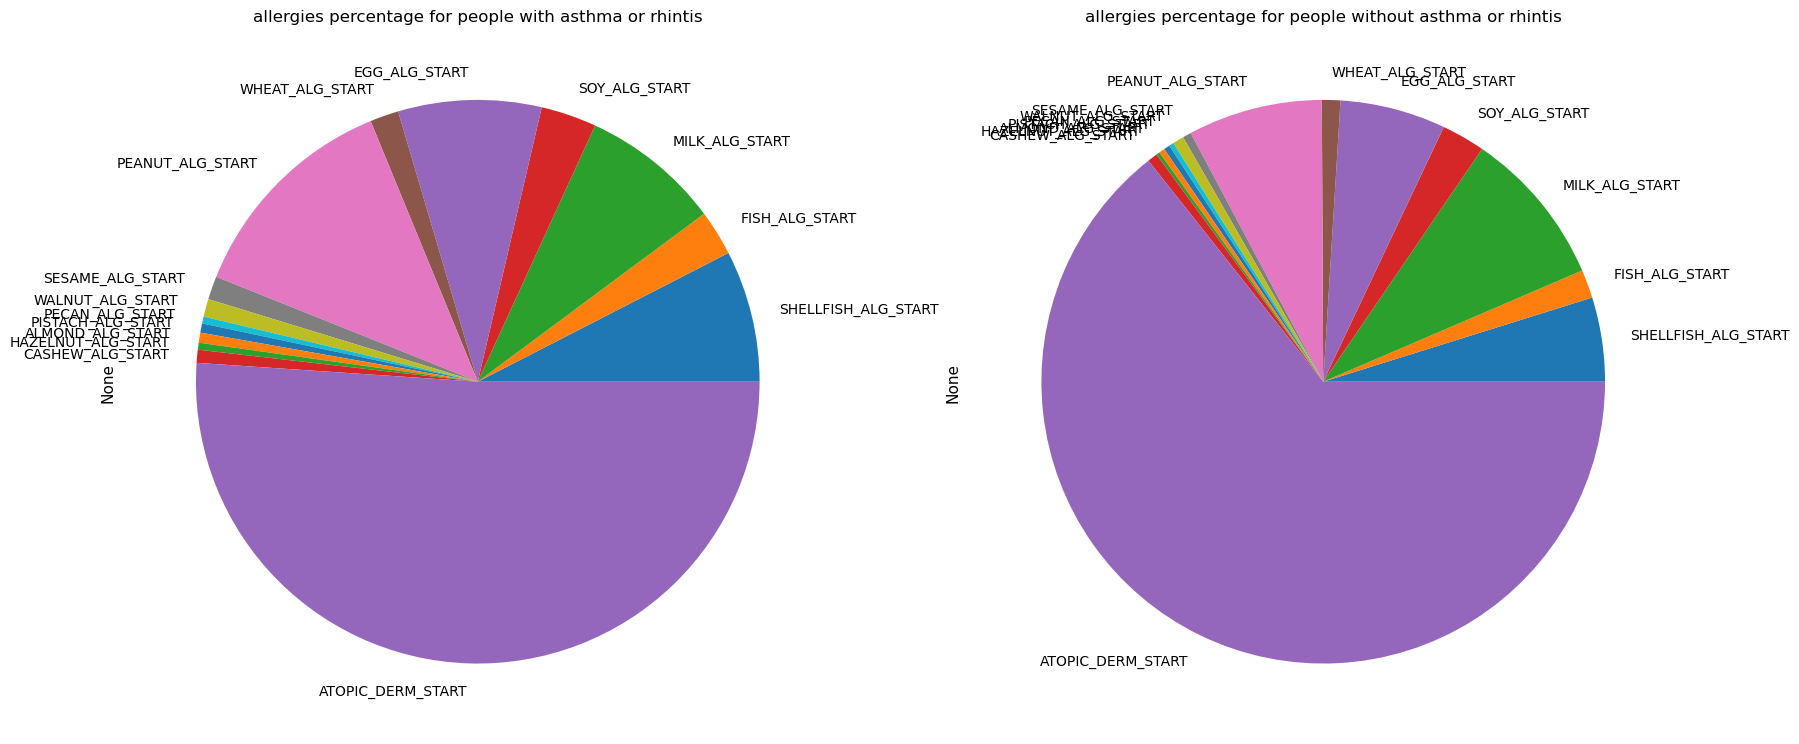

In [34]:
#Create pie charts to compare different allergy for people with asthma or rhintis and people without either
list_for_df_start = [i for i in list(df_clean) if 'END' not in i and 'RX' not in i]
df_clean_start = df_clean[list_for_df_start]
df_clean_food = df_clean_start.loc[:, "SHELLFISH_ALG_START":"ATOPIC_DERM_START"]
df_clean_food["RHINITIS_OR_ASTHMA"] = df_clean_start["ALLERGIC_RHINITIS_START"].notna() | df_clean_start["ASTHMA_START"].notna()
df_clean_food_asthma = df_clean_food[df_clean_food["RHINITIS_OR_ASTHMA"]]
df_clean_food_asthma = df_clean_food_asthma.loc[:, "SHELLFISH_ALG_START":"ATOPIC_DERM_START"]
df_clean_food_noasthma = df_clean_food[~df_clean_food["RHINITIS_OR_ASTHMA"]]
df_clean_food_noasthma = df_clean_food_noasthma.loc[:, "SHELLFISH_ALG_START":"ATOPIC_DERM_START"]

df_clean_food_asthma_p = df_clean_food_asthma.count()/len(df_clean_food_asthma) *100
df_clean_food_noasthma_p = df_clean_food_noasthma.count()/len(df_clean_food_noasthma) *100

plt.subplot(1, 2, 1)
df_clean_food_asthma_p.plot.pie(figsize=(20, 10))
plt.title('allergies percentage for people with asthma or rhintis')

plt.subplot(1, 2, 2)
df_clean_food_noasthma_p.plot.pie()
plt.title('allergies percentage for people without asthma or rhintis')

Text(0.5, 1.0, 'allergies percentage for people without asthma or rhintis')

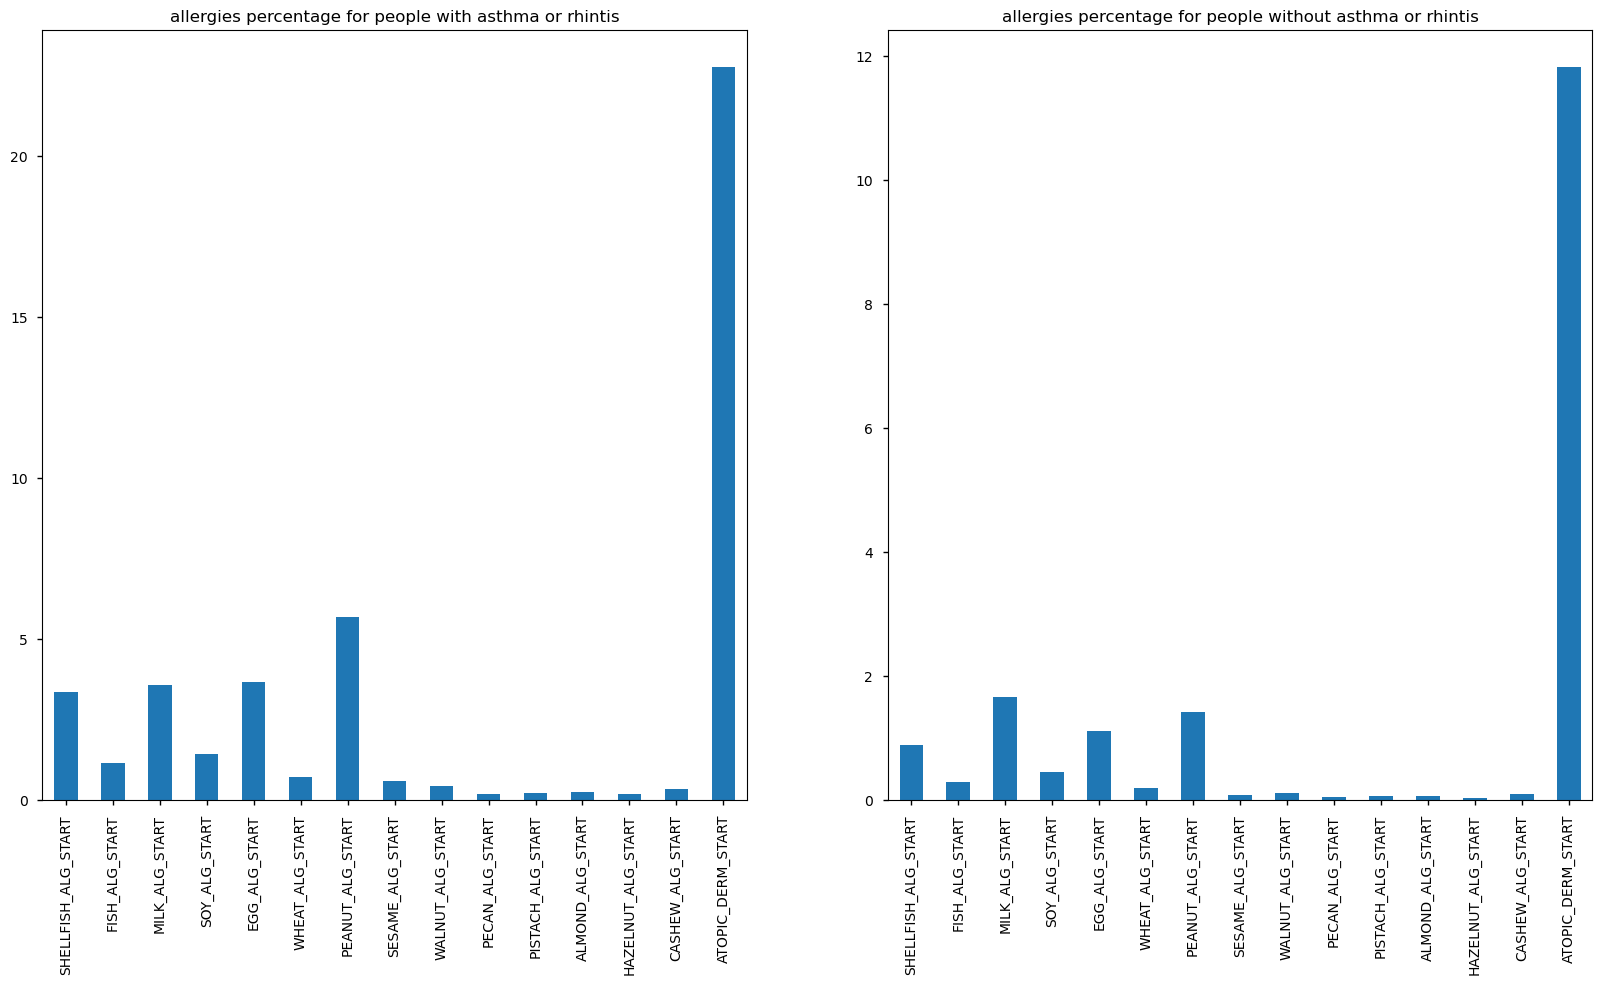

In [35]:
#Created bar graphs to compare percantage of different allergies for each person comparing people with asthma or rhintis and people without either
plt.subplot(1, 2, 1)
df_clean_food_asthma_p.plot.bar(figsize=(20, 10))
plt.title('allergies percentage for people with asthma or rhintis')

plt.subplot(1, 2, 2)
df_clean_food_noasthma_p.plot.bar()
plt.title('allergies percentage for people without asthma or rhintis')

Text(0.5, 1.0, 'allergies percentage for people without asthma or rhintis')

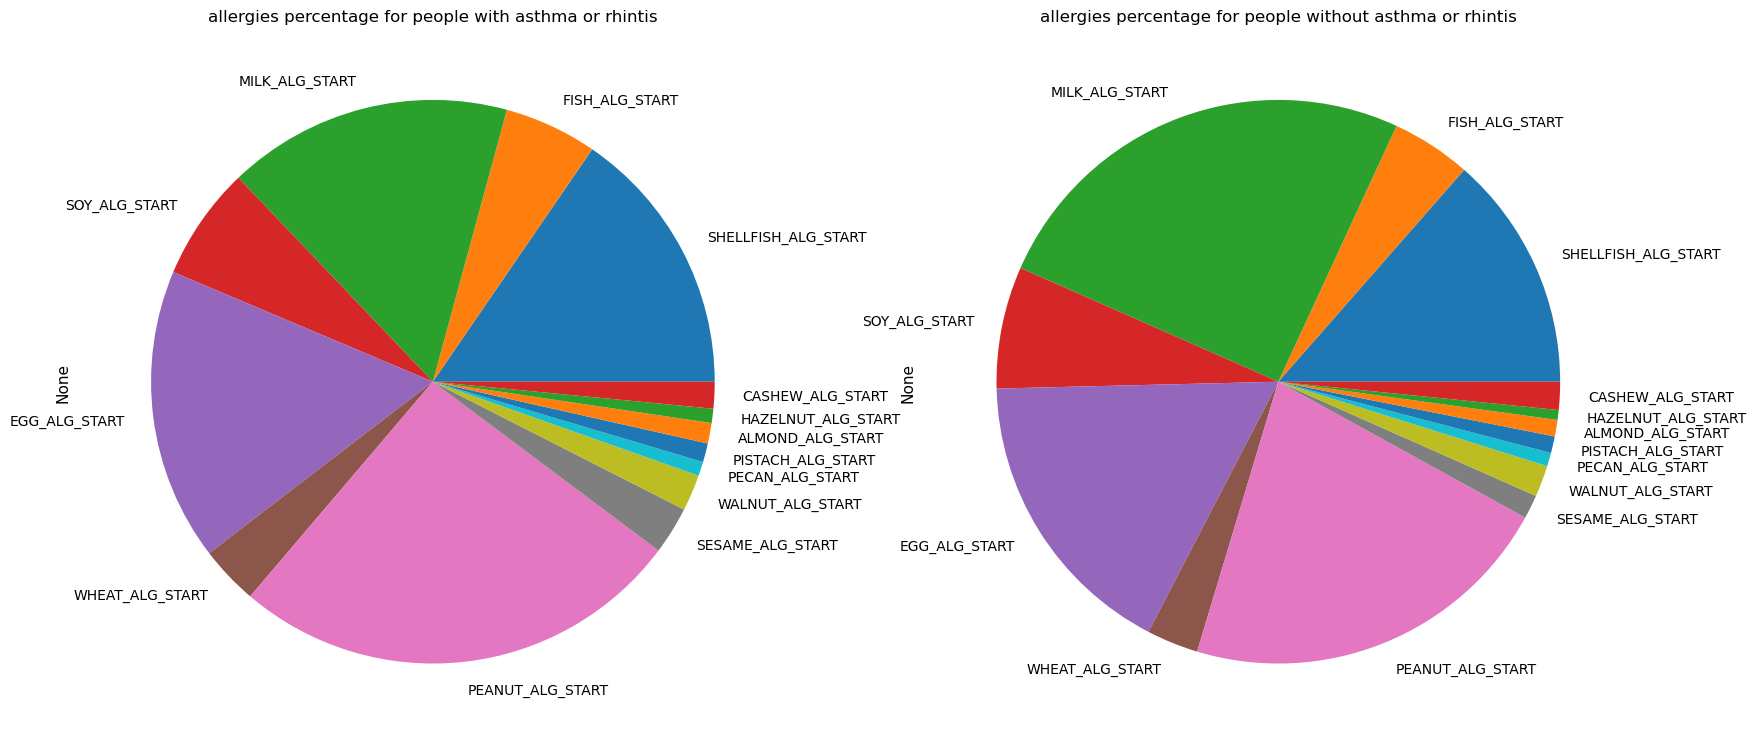

In [36]:
#same as the two top studies, but removed Atopic dermatitis since it was taking up such a large percentage, and it may or not be a food allergy.

df_clean_food_asthma = df_clean_food_asthma.loc[:, "SHELLFISH_ALG_START":"CASHEW_ALG_START"]
df_clean_food_noasthma = df_clean_food_noasthma.loc[:, "SHELLFISH_ALG_START":"CASHEW_ALG_START"]

df_clean_food_asthma_p = df_clean_food_asthma.count()/len(df_clean_food_asthma) *100
df_clean_food_noasthma_p = df_clean_food_noasthma.count()/len(df_clean_food_noasthma) *100

plt.subplot(1, 2, 1)
df_clean_food_asthma_p.plot.pie(figsize=(20, 10))
plt.title('allergies percentage for people with asthma or rhintis')

plt.subplot(1, 2, 2)
df_clean_food_noasthma_p.plot.pie()
plt.title('allergies percentage for people without asthma or rhintis')

Text(0.5, 1.0, 'allergies percentage for people without asthma or rhintis')

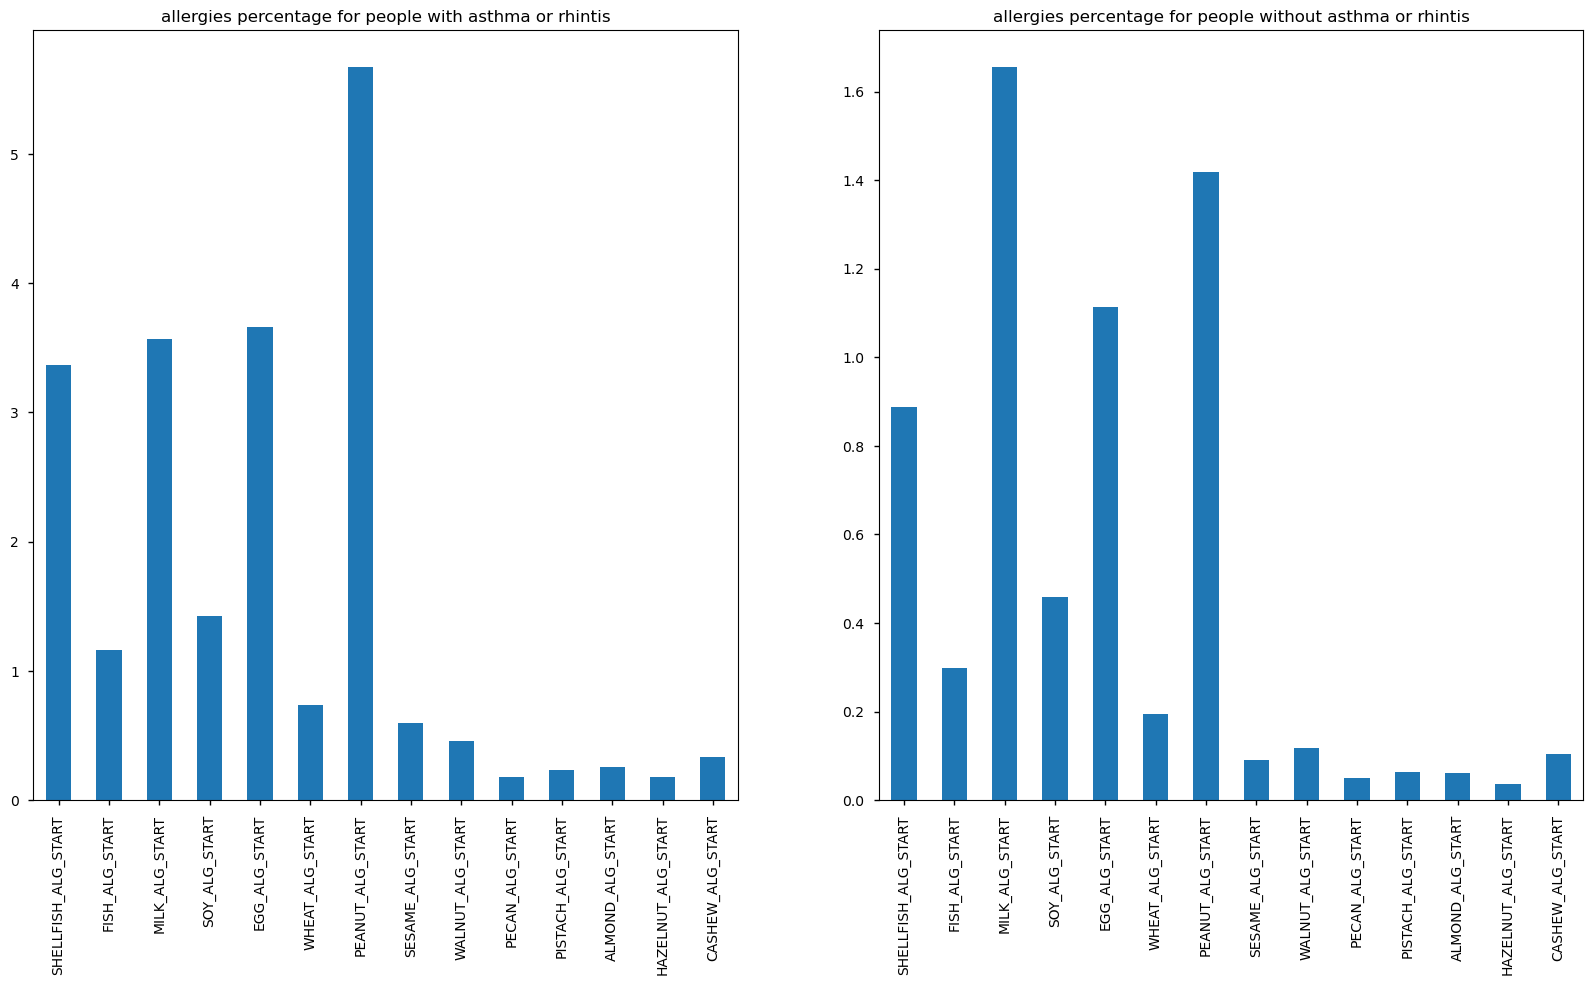

In [37]:
plt.subplot(1, 2, 1)
df_clean_food_asthma_p.plot.bar(figsize=(20, 10))
plt.title('allergies percentage for people with asthma or rhintis')

plt.subplot(1, 2, 2)
df_clean_food_noasthma_p.plot.bar()
plt.title('allergies percentage for people without asthma or rhintis')

Besides the fact the in the no asthma group, the percantage of poeple with milk allergy is higher compared to other allergies, the no asthma group follows a very similar trend to the with asthma group except that the overal values of having the allergy is lower.